## Data Reading

#### Loading data frame

In [1]:
#### Downloading the combined dataframe that contains the newly extracted features
!gdown --id 1zrctUoyepH5zksia21Cs6fYVZ1j1DAFU

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1zrctUoyepH5zksia21Cs6fYVZ1j1DAFU
From (redirected): https://drive.google.com/uc?id=1zrctUoyepH5zksia21Cs6fYVZ1j1DAFU&confirm=t&uuid=9ebc70a5-b126-4197-9209-3b247f2c31dd
To: /content/combined_df_colab.csv
100% 132M/132M [00:02<00:00, 59.9MB/s]


#### Import Libraries

In [2]:
!pip install textatistic
import os
from google.colab import drive

import pandas as pd

import nltk
from textblob import TextBlob
from textatistic import Textatistic
from nltk.tokenize import word_tokenize
import spacy
from scipy.stats import pearsonr

import json


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 861.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for textatistic: filename=textatistic-0.0.1-py3-none-any.whl size=29049 sha256=406184dd4287375f9fbd1350fe1a83f9437d6baec155c1047dab623b3ae4dde9
  Stored in directory: /root/.cache/pip/wheels/6e/31/c3/df8af4aa9ec3f671b0e8bc3bfa642c75918f2479ca4050f5f4
  Created wheel for pyhyphen: filename=PyHyphen-4.0.4-cp37-abi3-linux_x86_64.whl size=65463 sha256=2a91197ff08365f5d4560c3f964287d26d19ee87c0515501a90ef27e99a73eda
  Stored in directory: /root/.cache/pip/wheels/a0/39/c3/1b8e8428660809de72abc6f40f078bb04d7eb36f7d945e5933
Successfully built textatistic pyhyphen


#### Read and Explore Imported Data

In [3]:
combined_data_path = 'combined_df_colab.csv'

combined_df = pd.read_csv(combined_data_path) # the one we work on now

combined_df = combined_df.drop(columns=['Unnamed: 0'])

In [4]:
combined_df.columns

Index(['id', 'model_a', 'model_b', 'prompt', 'response_a', 'response_b',
       'winner_model_a', 'winner_model_b', 'winner_tie', 'polarity_a',
       'grammar_errors_a', 'sentiment_a', 'length_a', 'polarity_b',
       'grammar_errors_b', 'sentiment_b', 'length_b', 'winner'],
      dtype='object')

In [5]:
combined_df.shape

(49747, 18)

In [6]:
combined_df.columns

Index(['id', 'model_a', 'model_b', 'prompt', 'response_a', 'response_b',
       'winner_model_a', 'winner_model_b', 'winner_tie', 'polarity_a',
       'grammar_errors_a', 'sentiment_a', 'length_a', 'polarity_b',
       'grammar_errors_b', 'sentiment_b', 'length_b', 'winner'],
      dtype='object')

In [7]:
combined_df.head()

,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie,polarity_a,grammar_errors_a,sentiment_a,length_a,polarity_b,grammar_errors_b,sentiment_b,length_b,winner
0,30192,gpt-4-1106-preview,gpt-4-0613,Is it morally right to try to have a certain p...,The question of whether it is morally right to...,"As an AI, I don't have personal beliefs or opi...",1,0,0,0.059367,179,0.493484,516,0.072727,62,0.412338,134,1
1,30192,gpt-4-1106-preview,gpt-4-0613,"OK, does pineapple belong on a pizza? Relax an...","Ah, the age-old culinary conundrum that has di...","As an AI, I don't eat, so I don't have persona...",1,0,0,0.197292,125,0.513333,316,0.235417,52,0.633333,104,1
2,53567,koala-13b,gpt-4-0613,What is the difference between marriage licens...,A marriage license is a legal document that al...,A marriage license and a marriage certificate ...,0,1,0,0.040693,67,0.326948,134,0.100255,100,0.308418,234,0
3,53567,koala-13b,gpt-4-0613,How can I get both of them as quick as possibl...,If you want to get both a marriage license and...,"In California, here are the general steps to o...",0,1,0,0.037778,123,0.366667,255,0.221429,110,0.434524,291,0
4,53567,koala-13b,gpt-4-0613,What is the minimal time to get them? 1 day or...,The minimal time to get a marriage license and...,The marriage license in California is issued i...,0,1,0,0.086574,106,0.320833,206,0.079583,71,0.372500,149,0


In [8]:
combined_df['winner_tie'].value_counts()

,count
winner_tie,
0,49747


In [9]:
combined_df['winner_model_a'].value_counts() # model a wins 25117 and b 24630

,count
winner_model_a,
1,25117
0,24630


## Data Analysis and Model

### Stats

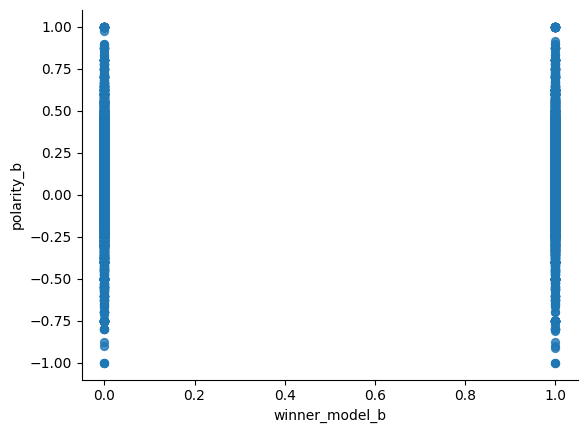

In [10]:
# @title winner model_b vs polarity_b
from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='winner_model_b', y='polarity_b', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

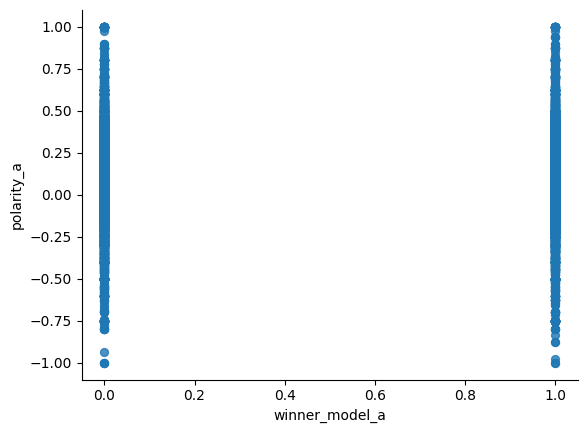

In [11]:
# @title winner model_a vs polarity_a
from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='winner_model_a', y='polarity_a', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

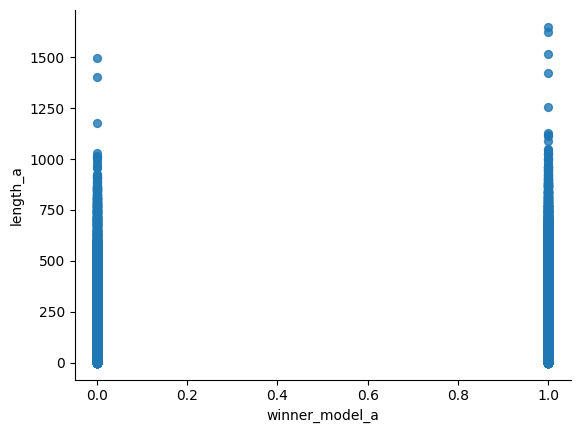

In [12]:
# @title winner model_a vs length_a
from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='winner_model_a', y='length_a', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

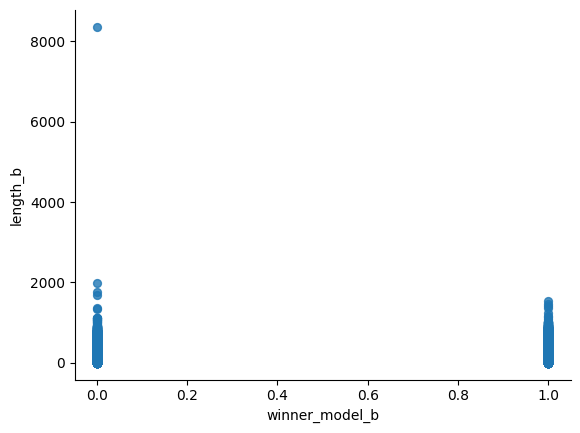

In [13]:
# @title winner model_b vs length_b
from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='winner_model_b', y='length_b', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

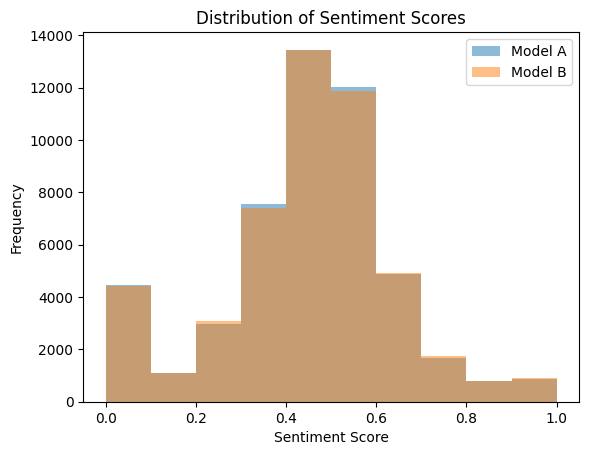

In [14]:
# @title Distribution of Sentiment Scores

import matplotlib.pyplot as plt

plt.hist(combined_df['sentiment_a'], alpha=0.5, label='Model A')
plt.hist(combined_df['sentiment_b'], alpha=0.5, label='Model B')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
_ = plt.legend()


In [15]:
def calculate_correlation(data, binary_column, numerical_column):
  corr, _ = pearsonr(data[binary_column], data[numerical_column])
  return corr


In [16]:
combined_df.columns

Index(['id', 'model_a', 'model_b', 'prompt', 'response_a', 'response_b',
       'winner_model_a', 'winner_model_b', 'winner_tie', 'polarity_a',
       'grammar_errors_a', 'sentiment_a', 'length_a', 'polarity_b',
       'grammar_errors_b', 'sentiment_b', 'length_b', 'winner'],
      dtype='object')

In [17]:
print(calculate_correlation(combined_df, 'winner_model_a','polarity_a'))

0.010424344913318919


In [18]:
print(calculate_correlation(combined_df, 'winner_model_b','polarity_b'))

0.0010189409441324127


In [19]:
print(calculate_correlation(combined_df, 'winner_model_a','sentiment_a'))

-0.011469135081666956


In [20]:
print(calculate_correlation(combined_df, 'winner_model_b','sentiment_b'))

-0.009783511723229886


In [21]:
print(calculate_correlation(combined_df, 'winner_model_a','length_a'))

0.12688128749407965


In [22]:
print(calculate_correlation(combined_df, 'winner_model_b','length_b'))

0.11147544435103357


In [23]:
print(calculate_correlation(combined_df, 'winner_model_a','grammar_errors_a'))

0.11048519306818785


In [24]:
print(calculate_correlation(combined_df, 'winner_model_b','grammar_errors_b'))

0.09670360956825835


### Model

In [25]:
combined_df.columns

Index(['id', 'model_a', 'model_b', 'prompt', 'response_a', 'response_b',
       'winner_model_a', 'winner_model_b', 'winner_tie', 'polarity_a',
       'grammar_errors_a', 'sentiment_a', 'length_a', 'polarity_b',
       'grammar_errors_b', 'sentiment_b', 'length_b', 'winner'],
      dtype='object')

In [26]:
len(combined_df)

49747

In [27]:
combined_df = pd.read_csv(combined_data_path)

In [28]:
# One-Hot-Encode data for the Random Forest to accept the model names data
combined_df_encoded = pd.get_dummies(combined_df, columns=['model_a', 'model_b'])

# # Define the feature columns
# feature_columns = [col for col in combined_df.columns if col.endswith('_a') or col.endswith('_b') or 'model_' in col]
non_feature_columns = ['id', 'prompt', 'response_a', 'response_b', 'winner_model_a', 'winner_model_b', 'winner_tie', 'winner']
feature_columns = [col for col in combined_df_encoded.columns if col not in non_feature_columns]


# Split the data into train and test sets
X = combined_df_encoded[feature_columns]
y = combined_df_encoded['winner']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.67      0.67      0.67      4994
           1       0.67      0.66      0.67      4956

    accuracy                           0.67      9950
   macro avg       0.67      0.67      0.67      9950
weighted avg       0.67      0.67      0.67      9950

